**BAR CHARTS**

***

***

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%load_ext pycodestyle_magic

In [3]:
%pycodestyle_on

***

***

# Simple bar chart

## Plot function

In [4]:
def bar_plot(data_x, data_y, fig_size):

    # Barplot.
    fig, ax = plt.subplots(figsize=fig_size)
    plt_name = 'bar_plot'

    # Set bar width.
    barWidth = 0.4

    # Set y values.
    y = data_y
    y_axis_label = r'y axis label'

    # Set position of bar on X axis.
    x_pos = np.arange(len(y))
    x_axis_label = r'x axis label'

    # Make the plot.
    plt.bar(x_pos,
            y,
            width=barWidth,
            zorder=3,
            color='#005f8a',
            edgecolor='white',
            label=r'')

    # Add the numbers on top of each bar.
    for x in range(len(x_pos)):
        plt.text(x=x,
                 y=y[x],
                 s=f'{y[x]:.1f}',
                 ha='center',
                 va='bottom',
                 fontsize=10)

    # Set grid.
    plt.grid(axis='y',
             color='gainsboro',
             linestyle='-',
             linewidth=0.2,
             zorder=0)

    # Add xticks on the middle of the group bars.
    plt.xticks([r for r in range(len(data_x))], data_x)

    # Remaining options.
    plt.xlabel(x_axis_label, labelpad=15)
    plt.ylabel(y_axis_label, labelpad=15)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.gcf().subplots_adjust(left=0.15)
    plt.ylim(0, np.max(y) + 2)
    plt.show()

    # Save resulting figure in two formats.
    fig.savefig(f'figures/{plt_name}.png',
                bbox_inches='tight')
    fig.savefig(f'figures/{plt_name}.pdf',
                bbox_inches='tight')

## Example

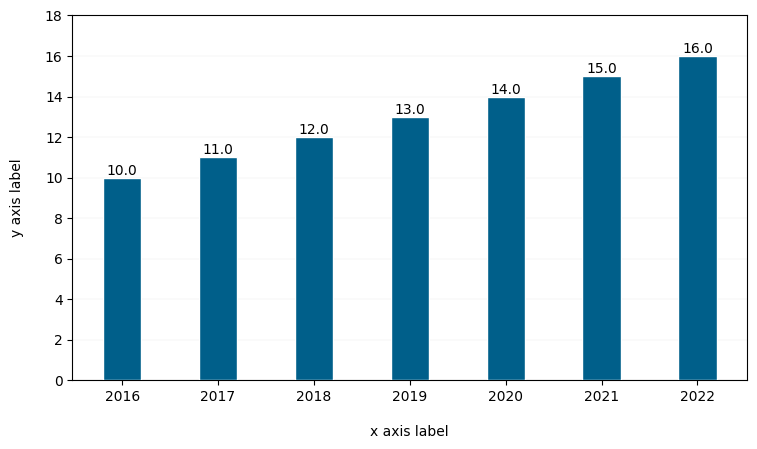

In [5]:
data_x = [2016 + x for x in range(0, 7)]
data_y = [x for x in range(10, 17)]
fig_size = (9, 5)

bar_plot(data_x, data_y, fig_size)

***

***